<a href="https://colab.research.google.com/github/celamyrrha/analise_de_dados_CECIERJ/blob/main/Atividade_Semana12_Marcela_Myrrha_da_Silva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade da Semana 12

Esta é atividade semanal sugerida. Você deverá preenchê-la e enviá-la dentro do prazo (até o fechamento da semana corrente).

###Questão 1

O número de veículos emplacados (ou seja, veículos que foram comprados novos) funciona como um indicador econômico que demonstra o poder aquisitivo da população em geral. Estes dados também são úteis como indicadores de saúde, uma vez que, uma frota mais nova, polui menos o ar e o número de casos de doenças respiratórias em grandes centros é reduzido. 

Sendo assim, a partir dos dados filtrados para 2020, calcule a média, mediana, mínimo, máximo, amplitude, variância e desvio padrão.

In [1]:
# Instalando o pacote 'ipeadatapy'
!pip install ipeadatapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Questao 1

# Carregando pacotes
import pandas as pd
import ipeadatapy

# Obtendo serie com dados sobre emplacamento de veículos
emplacamentos = ipeadatapy.timeseries('FENABRAVE12_VENDAUTO12')
emplacamentos.reset_index(inplace=True)
emplacamentos = emplacamentos.loc[(emplacamentos["DATE"] >= "2020-01-01") & (emplacamentos["DATE"] < "2021-01-01"), 
                                  "VALUE (Unidade)"]
emplacamentos.rename("emplacamentos", inplace=True)
emplacamentos

360    154556.0
361    165109.0
362    131230.0
363     39487.0
364     44133.0
365    102379.0
366    134927.0
367    142019.0
368    161071.0
369    168441.0
370    177550.0
371    194626.0
Name: emplacamentos, dtype: float64

In [10]:
# Questao 1 (continuacao)

# Calcule as estatísticas de interesse
print('média:',emplacamentos.mean()) #média

print('mediana:',emplacamentos.median()) #mediana

print('máximo:',emplacamentos.max()) #máximo

print('mínimo:',emplacamentos.min()) #mínimo

print('amplitude:',emplacamentos.max() - emplacamentos.min()) #amplitude

print('variância:',emplacamentos.var()) #variância

print('desvio padrão:',emplacamentos.std()) #desvio padrão




média: 134627.33333333334
mediana: 148287.5
máximo: 194626.0
mínimo: 39487.0
amplitude: 155139.0
variância: 2450749221.69697
desvio padrão: 49505.04238657886


###Questão 2

Ao observar a base de dados utilizada na questão anterior, argumente por que a moda não é uma medida útil para descrever o número de emplacamento de automóveis ao longo dos meses de 2020.

> Dê 2 cliques e insira sua resposta aqui:

Pois se fizermos a moda da sequência, vemos que é uma série amodal, temos vários valores que distintos, não demonstrando uma tendência.



###Questão 3

O Imposto sobre Produtos Industrializados, cuja sigla é IPI, é um imposto federal, ou seja, somente a União pode instituí-lo ou modificá-lo, sobre produtos industrializados no Brasil. Abaixo, obtemos os dados da arrecadação do IPI sobre automóveis em 2020.

Calcule a correlação entre o número de veículos emplacados e o IPI arrecadado em 2020.

In [11]:
# Questao 3

# Obtendo serie com dados sobre IPI arrecadado sobre automóveis
ipi = ipeadatapy.timeseries('SRF12_IPIVEI12')
ipi.reset_index(inplace=True)
ipi = ipi.loc[(ipi["DATE"] >= "2020-01-01") & (ipi["DATE"] < "2021-01-01"), 
                                  "VALUE (R$)"]
ipi.rename("ipi", inplace=True)

carros = pd.concat([emplacamentos.reset_index(drop=True),
                    ipi.reset_index(drop=True)],
                   axis=1)
carros

,emplacamentos,ipi
0,154556.0,247.920006
1,165109.0,177.051705
2,131230.0,247.665279
3,39487.0,158.782252
4,44133.0,55.799690
5,102379.0,84.358197
6,134927.0,166.653005
7,142019.0,250.102903
8,161071.0,292.598436
9,168441.0,322.059536


In [13]:
# Questao 3 (continuacao)

# Calcule a correlacao entre o numero de emplacamentos e o IPI recolhido pela União.


carros.corr()




,emplacamentos,ipi
emplacamentos,1.00000,0.80647
ipi,0.80647,1.00000


###Questão 4

Com a base de dados `carros`, faça um gráfico de dispersão utilizando `plt.scatter` entre `emplacamentos` e `ipi`.

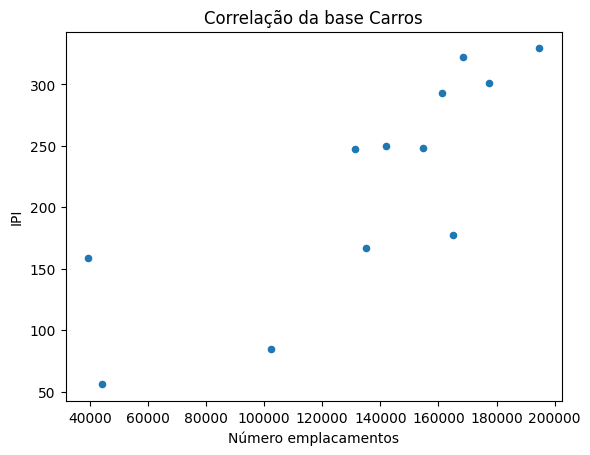

In [21]:
# Questao 4
from matplotlib import pyplot as plt

# Grafico de dispersao
carros.plot.scatter(x='emplacamentos', y='ipi')
plt.title("Correlação da base Carros")
plt.xlabel("Número emplacamentos")
plt.ylabel("IPI")

# Exibe o gráfico
plt.show()

###Questão 5

Com base nas questões 3 e 4, como você interpretaria o valor do coeficiente de correlação observado? O que ocorre com a arrecadação do IPI quando o número de veículos emplacados aumenta?

> Dê 2 cliques e insira sua resposta aqui:

Temos uma correlação alta, que é demonstrada através do coeficiente 0,8, e direta, pois quanto mais alto o IPI mais alto o emplacamento.